# Feature Engineering With Titanic Dataset

In [16]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [17]:
# dataset
titanic = pd.read_csv("datasets/titanic.csv")

### Data Dictionary

survival -> 0 = No, 1 = Yes
pclass -> 1 = 1st, 2 = 2nd, 3 = 3rd
embarked -> C = Cherbourg, Q = Queenstown, S = Southampton

In [18]:
# Dropping unnecessary columns
titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [19]:
# Changing Sex (gender) and Embarked to numerical values
labelEncoder = LabelEncoder()
labelBinary = LabelBinarizer()

titanic.Sex = labelBinary.fit_transform(titanic.Sex)
titanic.Embarked = labelEncoder.fit_transform(titanic.Embarked)

In [20]:
# Separating the supporting features (X) from the predictor feature (y)
X = titanic.drop(columns=['Survived'])
y = titanic[['Survived']]

### Starting our Feature Engineering

In [21]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


In [52]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,30.272590,0.447368,0.392344,35.560845,1.401914
std,0.841838,0.481622,14.181209,0.896760,0.981429,55.856972,0.854496
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.471875,2.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [53]:
X.Fare.fillna(X.groupby(['Pclass'])['Fare'].transform('median'), inplace=True)

In [54]:
X.Fare.value_counts()

7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     12
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: Fare, Length: 169, dtype: int64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

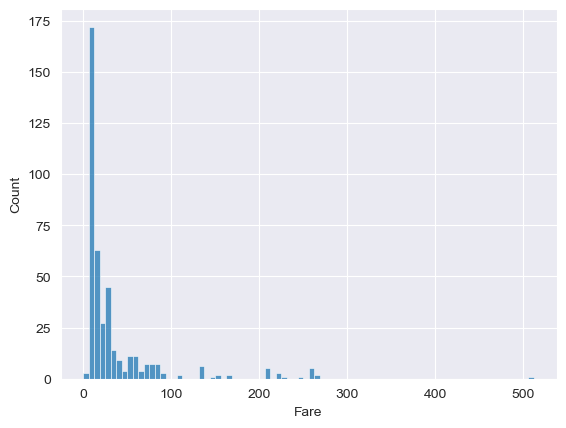

In [55]:
sns.histplot(X.Fare)

<AxesSubplot:>

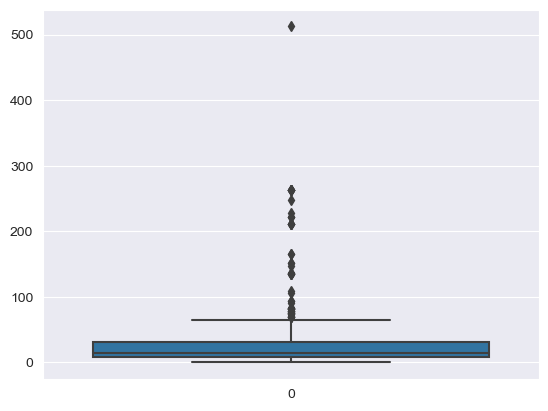

In [56]:
sns.boxplot(X.Fare)

In [57]:
X.Fare[X.Fare == X.Fare.max()]

343    512.3292
Name: Fare, dtype: float64

In [58]:
X.Pclass.value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass'>

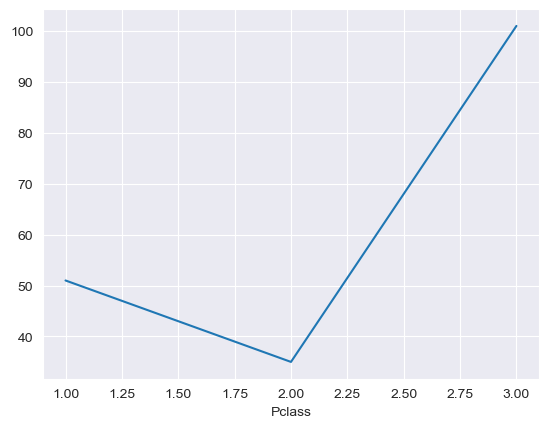

In [61]:
X.groupby(['Pclass'])['SibSp'].sum().plot()

In [62]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns = X.columns
X_std = scaler.fit_transform(X)
X = pd.DataFrame(X_std, columns=columns)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.873482,0.755929,0.298549,-0.499470,-0.400248,-0.497071,-0.470915
1,0.873482,-1.322876,1.181328,0.616992,-0.400248,-0.511934,0.700767
2,-0.315819,0.755929,2.240662,-0.499470,-0.400248,-0.463762,-0.470915
3,0.873482,0.755929,-0.231118,-0.499470,-0.400248,-0.482135,0.700767
4,0.873482,-1.322876,-0.584229,0.616992,0.619896,-0.417159,0.700767
